In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification, make_moons
from sklearn.model_selection import train_test_split

from nn_utils.nn import Model

In [3]:
def plot_data(X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.6)
    plt.show()

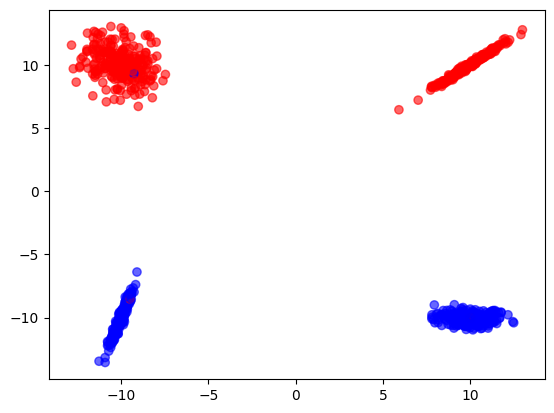

In [112]:
X, y = make_classification(n_samples = 1000, n_classes = 2, n_features = 2, 
                           n_informative=2, n_redundant=0, random_state = 42,
                            class_sep=10)
plot_data(X, y)
plt.show()
X_train, X_test, y_train, y_test = train_test_split(X, y.reshape(-1,1), test_size=0.2, random_state=42)

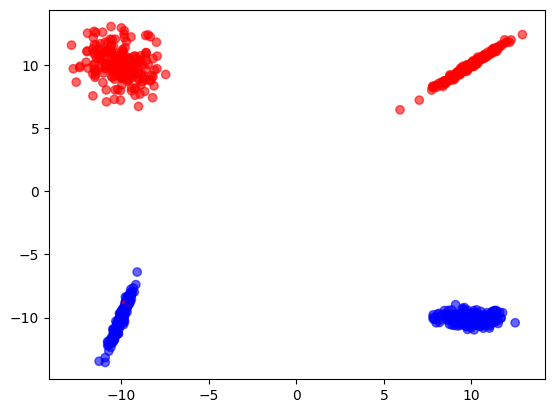

In [115]:
plot_data(X_train, y_train)

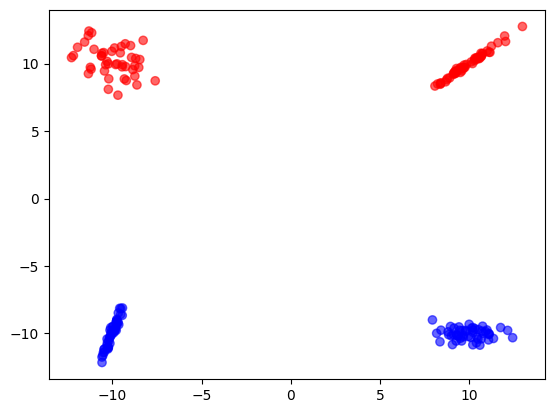

In [117]:
plot_data(X_test, y_test)

In [119]:
y_test.shape

(200, 1)

In [122]:
hyperparameters = {
    "inputDim": X_train.shape[1],
    "hiddenDim": 16,
    "outputDim": 2,
    "numLayers": 8,
    "learningRate": 0.1,
    "activationFunction": "relu",
    "dropoutRate": 0.0,
    "epochs": 150,
    "batchSize": 64,
}

In [124]:
model = Model(**hyperparameters)
model.num_params()

TypeError: super(type, obj): obj must be an instance or subtype of type

In [118]:
model.train(X_train, y_train, X_test, y_test, epochs_print=10)

(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(32, 1)
(200, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(32, 1)
(200, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(32, 1)
(200, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(32, 1)
(200, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(32, 1)
(200, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(32, 1)
(200, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(32, 1)
(200, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(32, 1)
(200, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)
(64, 1)


In [102]:
y_test.shape

(200, 1)

In [108]:
y_test_pred = model.predict(X_test)
np.argmax(y_test_pred, axis=1)

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1], dtype=int64)

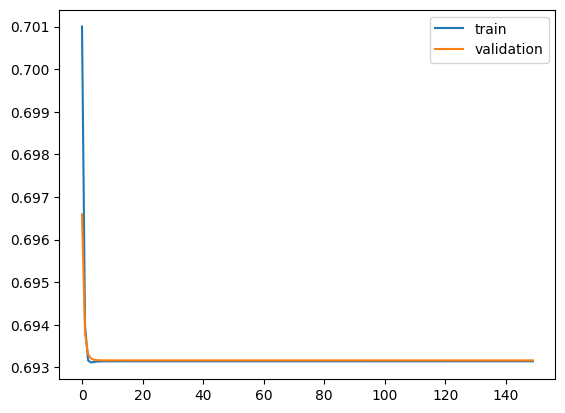

In [111]:
# plot the training loss and validation loss
plt.plot(model.trainLoss, label="train")
plt.plot(model.valLoss, label="validation")
plt.legend()
plt.show()
